In [1]:
# from esn import *
import numpy as npy
import matplotlib.pyplot as plt
from scipy import linalg 
from typing import NamedTuple, Callable, Optional



import functools
from sklearn.decomposition import PCA

from mpl_toolkits.mplot3d import Axes3D
import transforms3d 

from sklearn.preprocessing import MinMaxScaler
from numpy import Inf, NaN

In [2]:
import os, sys

sys.path.append('AMCParser')
import amc_parser as amc

In [3]:
%load_ext autoreload
%autoreload 2
from skeleton import *

# Data

## walking to running

In [4]:
# load data
data_walk = npy.load('data_walk.npy')
data_run = npy.load('data_run.npy')

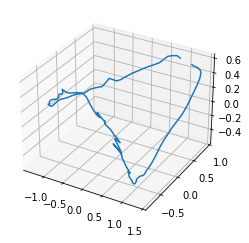

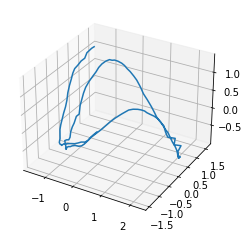

In [5]:
# # pca of each of the time series
for d in [data_walk[25:161], data_run[25:161]]:
    pca = PCA(n_components=3)
    pca.fit(d)
    d_pca = pca.transform(d)

    # plot the pca
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(d_pca[:,0], d_pca[:,1], d_pca[:,2])
    plt.show()

In [6]:
# scale shift the data
data_concat = npy.concatenate((data_walk, data_run), axis=0)

scaler = MinMaxScaler(feature_range=(-1, 1))
data_concat_sc_sh = scaler.fit_transform(data_concat)

# data_normal = scaler.inverse_transform(data_concat_sc_sh)

In [7]:
data_walk_sc_sh = data_concat_sc_sh[:data_walk.shape[0],:]
data_run_sc_sh = data_concat_sc_sh[data_walk.shape[0]:,:]

In [8]:
# nake the two time series the same size and concatenate along a new axis
data_walk_sc_sh = data_walk_sc_sh[:data_run_sc_sh.shape[0],:]
# concatenate along a new axis
data_stack_sc_sh = npy.stack((data_walk_sc_sh, data_run_sc_sh))

In [9]:
data = data_stack_sc_sh

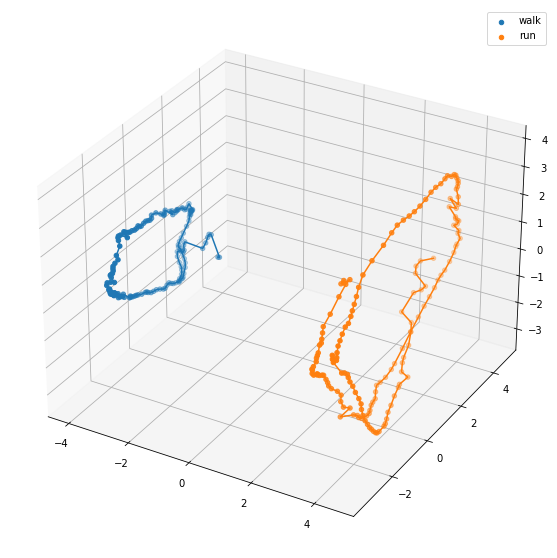

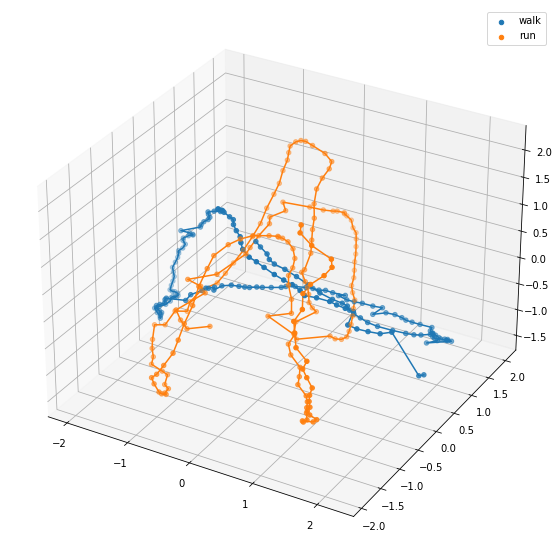

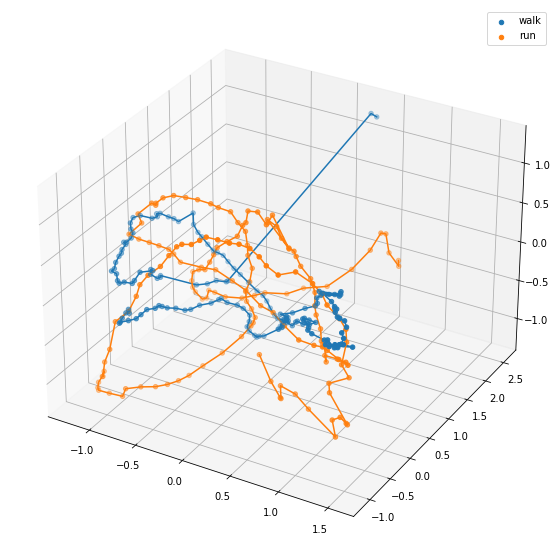

In [10]:
# pca of the data
pca = PCA(n_components=(9))
pca.fit(data.reshape(-1, data.shape[-1]))
data_pca = pca.transform(data.reshape(-1, data.shape[-1]))
data_pca = data_pca.reshape(data.shape[0], data.shape[1], -1)

# plot the pca
for i in range(3):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data_pca[0,:,0+i*3], data_pca[0,:,1+i*3], data_pca[0,:,2+i*3], label = 'walk')
    ax.scatter(data_pca[1,:,0+i*3], data_pca[1,:,1+i*3], data_pca[1,:,2+i*3], label = 'run')

    ax.plot(data_pca[0,:,0+i*3], data_pca[0,:,1+i*3], data_pca[0,:,2+i*3])
    ax.plot(data_pca[1,:,0+i*3], data_pca[1,:,1+i*3], data_pca[1,:,2+i*3])
    plt.legend()
    plt.show()

## Generate video

In [14]:
# load the initial condition for the movement
data_ini_walk = np.load("data_ini_walk.npy")
data_ini_walk = [[data_ini_walk[0], data_ini_walk[1]], [data_ini_walk[2]]]
                 
data_ini_run = np.load("data_ini_walk.npy")
data_ini_run = [[data_ini_run[0], data_ini_run[1]], [data_ini_run[2]]]

# load the information about the skeleton
c_joints = np.load('c_joint.npy', allow_pickle=True).item()
norm_ij = np.load('norm_ij.npy')

In [18]:
## video of the behavior
data_walk_unsc = scaler.inverse_transform(data[0])
joint_coordinate_arr = angle2Coordinate(data_walk_unsc, data_ini_walk, c_joints, norm_ij)
video_generation(joint_coordinate_arr, c_joints, out_path = './video/driven_walk.gif', display = "circle")

data_run_unsc = scaler.inverse_transform(data[1])
joint_coordinate_arr = angle2Coordinate(data_run_unsc, data_ini_run, c_joints, norm_ij)
video_generation(joint_coordinate_arr, c_joints, out_path = './video/driven_run.gif', display = "circle")